<a href="https://colab.research.google.com/github/jserrataylor/cursoAI/blob/main/Algoritmo_No_Supervisado_Cluster_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


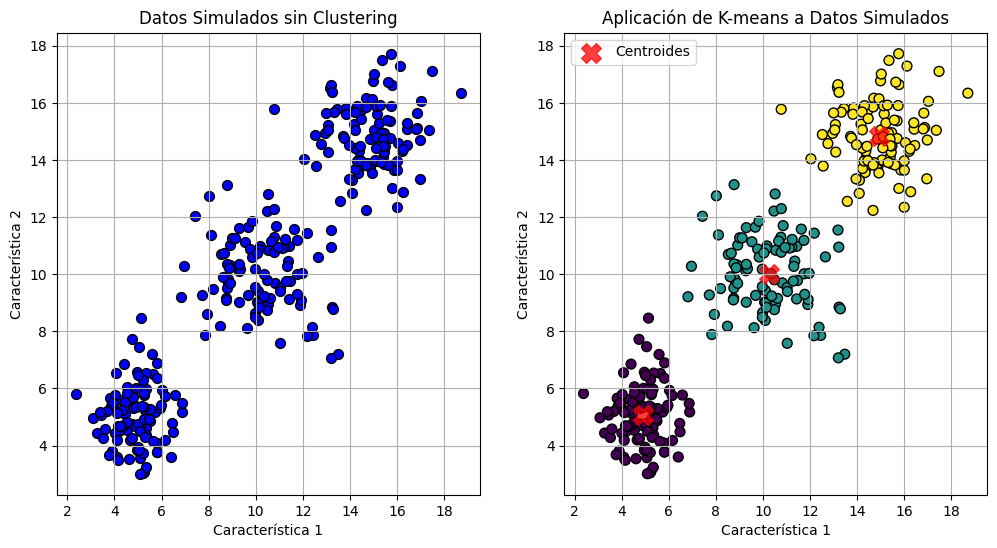

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generar datos simulados
np.random.seed(42)
X1 = np.random.normal(loc=5, scale=1, size=(100, 2))
X2 = np.random.normal(loc=10, scale=1.5, size=(100, 2))
X3 = np.random.normal(loc=15, scale=1.2, size=(100, 2))
X = np.vstack((X1, X2, X3))

# Aplicar k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizar los datos en un gráfico doble (subplots)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Datos Simulados sin Clustering
axes[0].scatter(X[:, 0], X[:, 1], color='blue', marker='o', edgecolor='k', s=50)
axes[0].set_title('Datos Simulados sin Clustering')
axes[0].set_xlabel('Característica 1')
axes[0].set_ylabel('Característica 2')
axes[0].grid(True)

# Aplicación de K-means a Datos Simulados
axes[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X', label="Centroides")
axes[1].set_title('Aplicación de K-means a Datos Simulados')
axes[1].set_xlabel('Característica 1')
axes[1].set_ylabel('Característica 2')
axes[1].legend()
axes[1].grid(True)

#plt.tight_layout()
#plt.show()

In [ ]:
X1, X2, X3
